In [1]:
# Multi Layer Perceptron with Random Forest Feature Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\rf_fs_train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families,damage_grade
11460,22,1366,5510,2,15,5,5,t,w,n,f,x,s,0,0,0,0,1,1,1
256730,13,783,11773,3,0,7,5,n,r,n,x,q,s,0,1,0,0,0,1,1
128430,6,1253,9708,4,5,18,12,t,i,x,v,s,t,0,0,0,0,0,0,1
178958,13,223,4236,2,20,6,4,t,r,n,f,q,s,0,1,0,0,0,1,1
256674,20,173,2261,2,15,13,5,t,w,q,f,x,s,0,0,0,0,1,1,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])

In [11]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families,damage_grade
11460,22,1366,5510,2,15,5,5,2,4,0,0,3,2,0,0,0,0,1,1,1
256730,13,783,11773,3,0,7,5,0,2,0,3,1,2,0,1,0,0,0,1,1
128430,6,1253,9708,4,5,18,12,2,1,2,2,2,3,0,0,0,0,0,0,1
178958,13,223,4236,2,20,6,4,2,2,0,0,1,2,0,1,0,0,0,1,1
256674,20,173,2261,2,15,13,5,2,4,1,0,3,2,0,0,0,0,1,1,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,19].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.8820 - accuracy: 0.5755 - val_loss: 0.8521 - val_accuracy: 0.5868
Epoch 2/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.8308 - accuracy: 0.5992 - val_loss: 0.8320 - val_accuracy: 0.5933
Epoch 3/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.8035 - accuracy: 0.6142 - val_loss: 0.7987 - val_accuracy: 0.6125
Epoch 4/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7746 - accuracy: 0.6302 - val_loss: 0.7806 - val_accuracy: 0.6279
Epoch 5/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7609 - accuracy: 0.6386 - val_loss: 0.7745 - val_accuracy: 0.6290
Epoch 6/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7497 - accuracy: 0.6451 - val_loss: 0.7706 - val_accuracy: 0.6297
Epoch 7/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7443 - accuracy: 0.6482 - val_loss: 0.7669 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

472/472 [==============================] - 0s 813us/step - loss: 0.7565 - accuracy: 0.6398
Test accuracy: 0.6398009657859802


In [18]:
y_pred = model.predict(X_test)

472/472 [==============================] - 0s 671us/step


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           1       0.75      0.77      0.76      5052
           2       0.51      0.47      0.49      5030
           3       0.65      0.67      0.66      4993

    accuracy                           0.64     15075
   macro avg       0.64      0.64      0.64     15075
weighted avg       0.64      0.64      0.64     15075



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


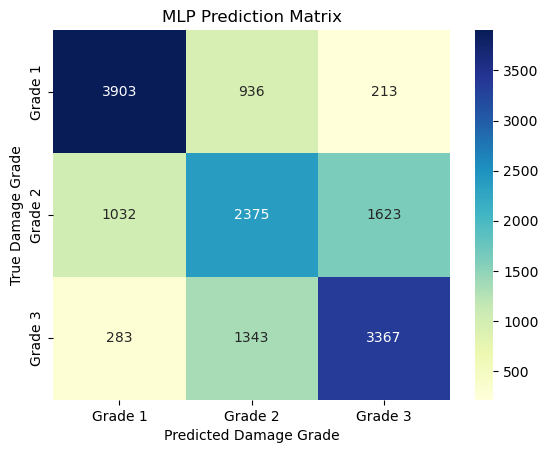

In [21]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("MLP Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()